In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Intro to NN Regression

What is a regression problem?
* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I save each week for fuel?



Questions with how much/how many.

regression analysis is a set of statistical processes for estimating the relationships between dependent variable and one or more independent variables. The most common form of regression is linear regression, in which a researcher finds the line that most closely fits the data according to a specific methematical criterion. 

What we're going to cover
* architecture of nn regression model.
* input shapes and output shapeps of a regression model (features and labels)
* creating custom data to view and fit
* steps in modelling
 * creating a model, compiling a model, fitting a model, evaluating a model
* different evaluation methods
* saving and loading models

### Inputs and outputs of NN Regression model

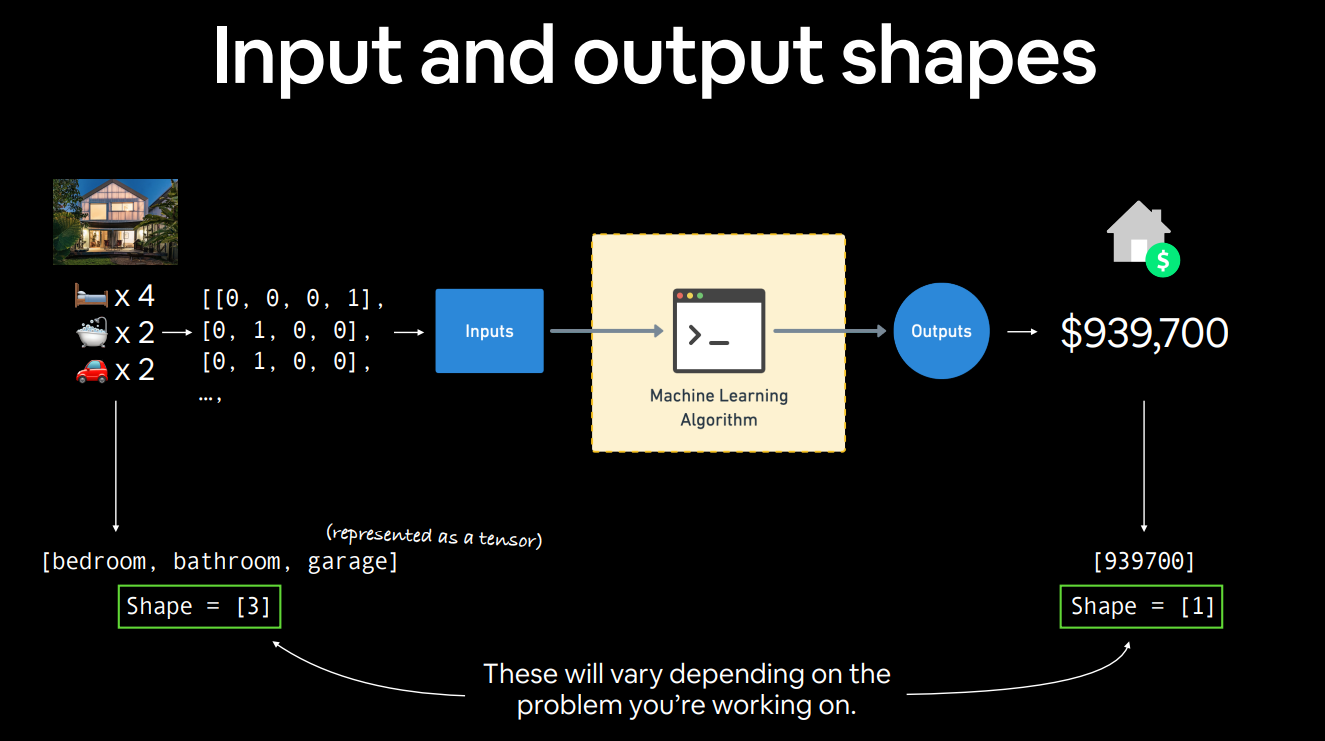

In most cases the input shape will be a tensor of a certain length (depends on the number of variables used in the model) and the output will almost always be a single tensor of shape 1 for each row. 

### Anatomy of Neural Networks

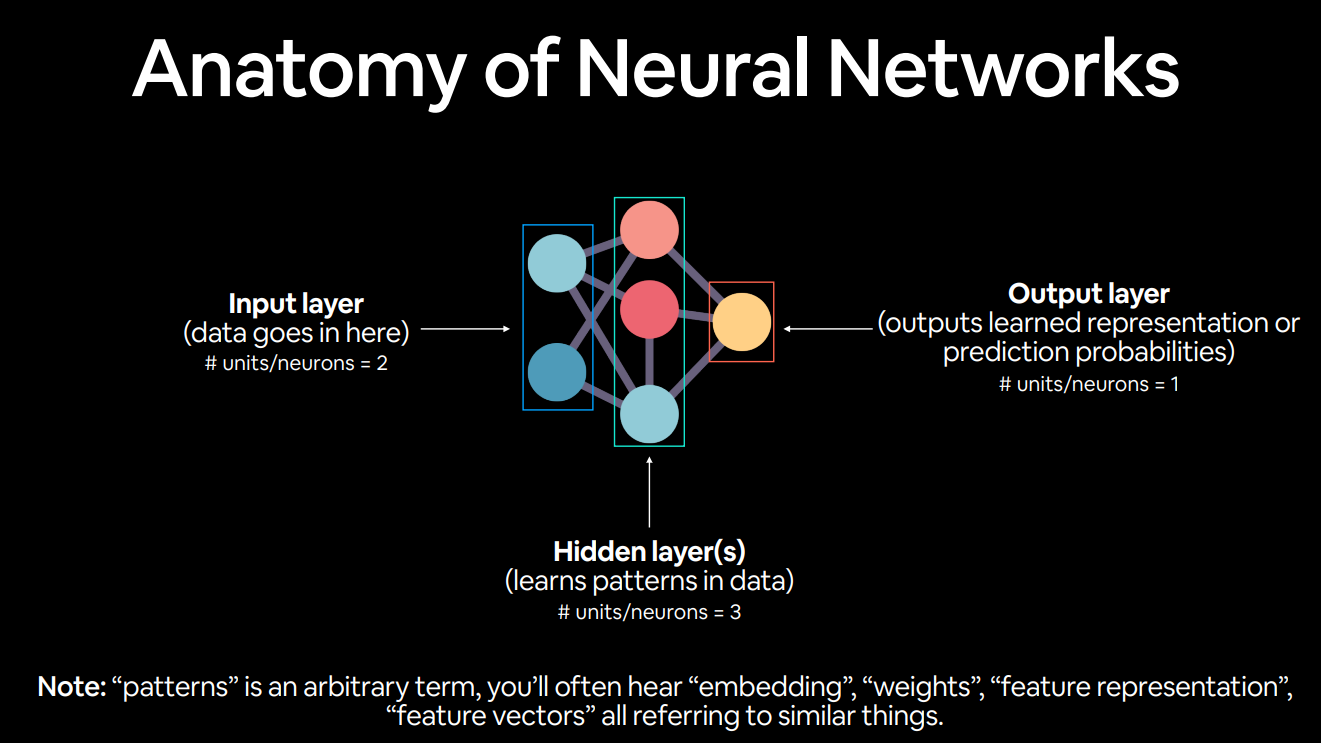

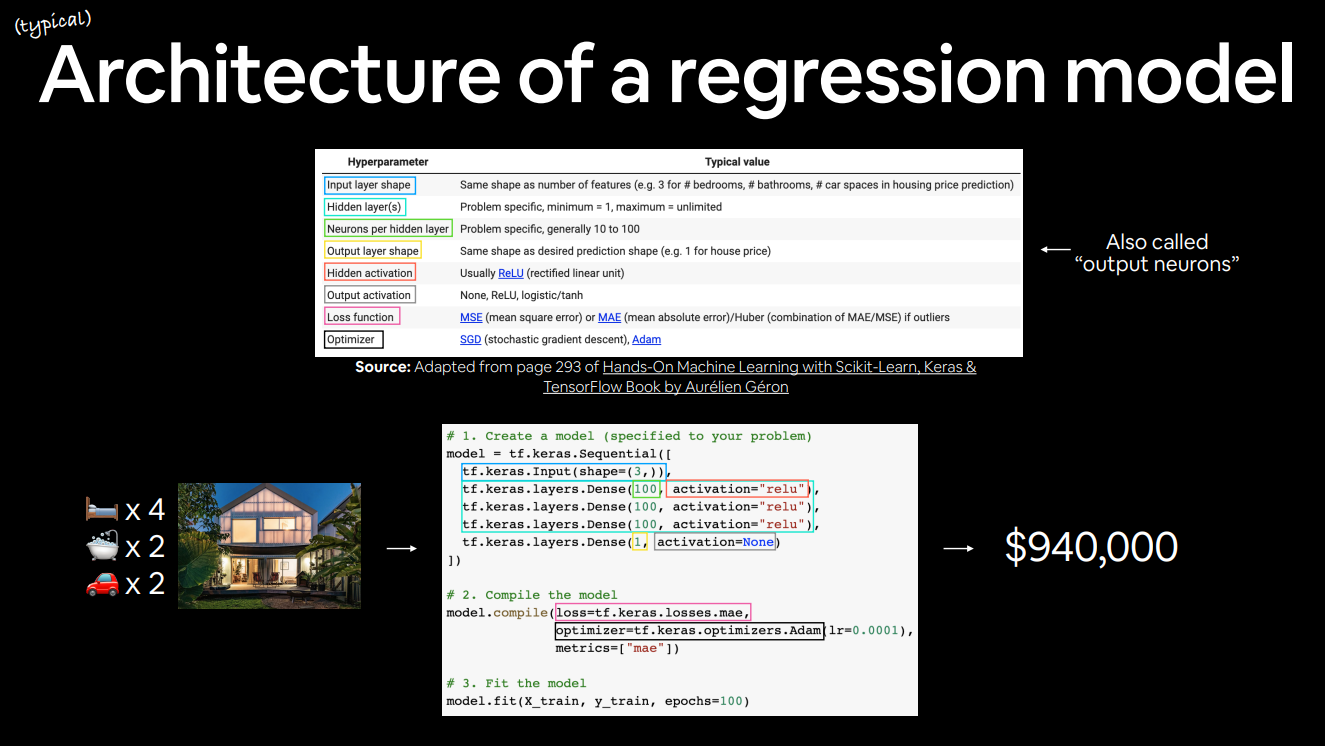

In [4]:
#so lets create a model
model = tf.keras.Sequential([tf.keras.Input(shape = [3,]),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(1, activation = None)])

In [5]:
#then we'll compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001), 
              metrics = ['mae'])

In [6]:
#finally we will fit the model
#model.fit(X_train, y_train, epochs = 100)

### creating sample regression data so we can model it

there are many definitions for a regression problem bu in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables

In [7]:
print(tf.__version__)

In [8]:
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0, 11.0, 14.0])
#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

In [9]:
#vis the data
plt.scatter(X,y)

right now the pattern we have is y == X + 10. the goal is to get the NN to learn this pattern and correctly predict future values.

In [10]:
#input and output shapes
X.shape, y.shape

In [11]:
#turn our np arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

### major steps in modelling with tf

1. **creating a model** - define the input and output layers, as well as hidden layers
2. **compiling the model** - define the loss function (in other words, the fn which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patters its learning), and eval metrics (what we can use the interpret the performance of our model).
3. **fitting a model** - letting the model try to find patterns between X & y ( features and labels).

In [12]:
#set random seed to create reproducability
tf.random.set_seed(42)

#1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean absolute error
             optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

#3. fit the model
model.fit(X, y, epochs = 5)

In [13]:
#the same code as above, written a different way
#1. create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
#2. compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean absolute error
             optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

#3. fit the model
model.fit(X, y, epochs = 5)

#at first our model is wrong by 10.5 and it slowly improves to be wrong by 10.05

In [14]:
#check out X and y
X, y

In [15]:
#try and make a prediction using our model
#predicting a value of 17, what do you think our output should be? probably 27?
y_pred = model.predict([17.0])
y_pred
#this prediction is really wrong, but based on our loss values that we saw when running the model it kind of makes sense.

### improve out model results

we can improve the model by altering the steps we took to create the model
1. **creating a model** -  here we might add more layers, increase the number of hidden neurons within each layers, change the activation functions of each layer
2. **compiling the model** - here might change the optimizer or perhaps the learning rate of the optimizer
3. **fitting the model** - here we might fit a model for more epochs (leave it train for longer), or on more data (give the model more data to learn from)

#### first we'll improve the model by only increasing the number of epochs

In [16]:
#in the first improving method we'll only increase the number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
             optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

model.fit(X, y, epochs = 100)

#this improves the loss from 12.3 down to 6.8

In [17]:
#now lets try to preidct a value with this new model
y_pred = model.predict([17.0])
y_pred
#we expected the value to be 27 so our new model is only about 2.6 off of the expected value

#### Now we'll also add in some h idden layers with a large number of neurons to see if that improves the models prediction

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])
model.fit(X, y, epochs = 100)

In [19]:
#looks like by just adding 1 hidden layers with 100 neurons each brought the loss down to 5.0.
#let's make a prediction to see how close the value of the prediction is
y_pred = model.predict([17.0])
y_pred
#the predicted value is 31 (should be 27) which is still 3 off. so there hasn't really been any improvement.

in this case teh model might be overfitting.. meaning the model is learning the data too well and is unable to extrapolate new values.

sometime the metrics you see during training aren't necessarily representative of an accurate model for data the model has never seen before.

In [20]:
#let's try one more thing (setting optimizer to adam and learning rate to 0.01)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['mae'])
model.fit(X, y, epochs = 100)

In [21]:
y_pred = model.predict([17.0])
y_pred

In [22]:
#that's the best result yet.

In [23]:
#let's predict a few more values to see what the results will be
model.predict([6.0, 9.0, 10.0, 18.0, 22.0, -100.0])

In [24]:
#all the values that are within the range of training data are accurate. values that fall way outside
#of the training data are still inaccurate (-100 should be -90 but it's predicing -67)

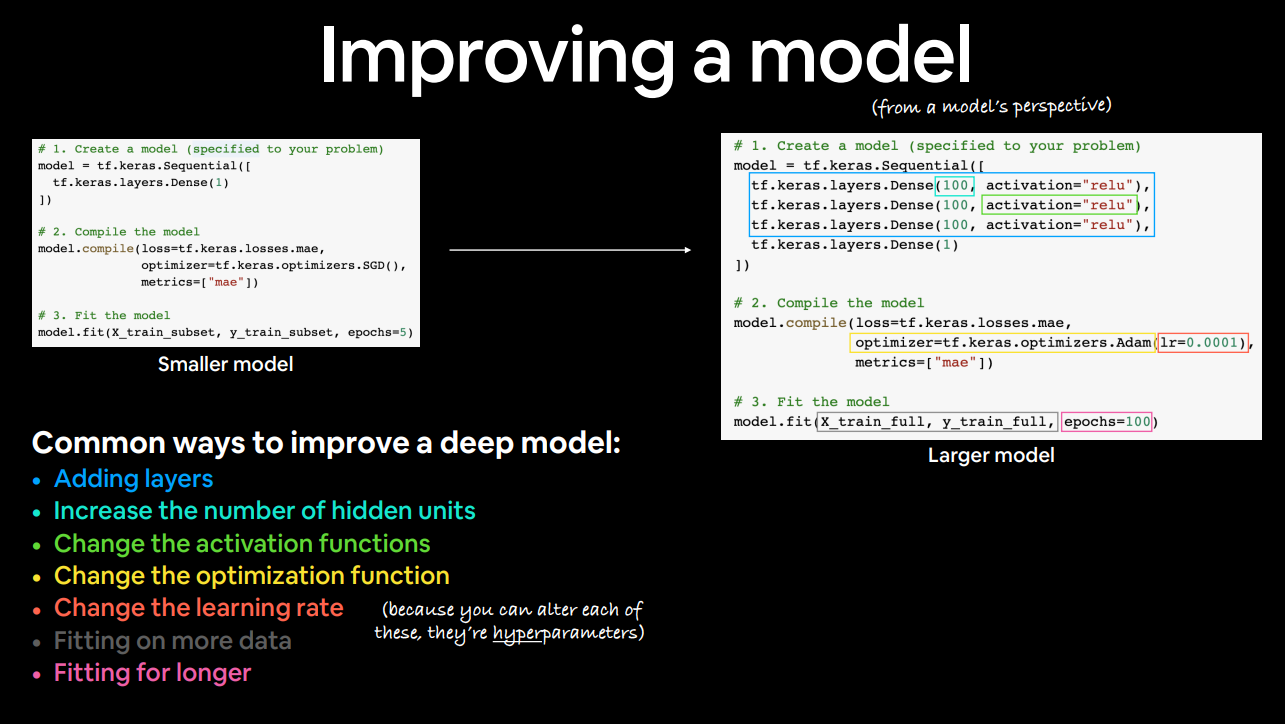

#### the most important param to change will ikely be the learning rate

### Evaluating a TF model pt 1 (visualize, visualize, visualize)

in practice, a typical workflow you'll go through when building a NN is:

```
Build a model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit model -> evaluate it
```

when it comes to evaluation... there are 3 workds you should memorise:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we workign with, what does it look like
* the model itself - what does our model look like
* the training of a model - how does a model perform while it learns
* predictions of the model - how do the predictions of a model line up against ground truth

In [25]:
#make a bigger dataset
X = tf.range(-100, 100, delta = 4)
X

In [26]:
#make labels for the dataset
y = X+10
y

In [27]:
#vis the data
plt.scatter(X,y)

#### the three sets - training set, test set, validation set


most of the time we will not train and evaluate on the same dataset.

* training set - the model learns from this data, which is typically 70-80% of the data we have available
* validation set- this data is what is used to tweak to model. the model gets tuned on this data. typically 10-15% of the data available
* test set - the model gets evaluated on this data to test what it has learned. this set is typically 10-15% of the total data available.


The goal of the 3 datasets is generalization - or the ability for a machine learning model to perform well on data is hasn't seen before

In [28]:
#split the dataset above into the train test split with 80%
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]


len(X_train), len(X_test)

In [29]:
#now let's vis the data after the split 
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c= 'b', label = 'training data')
plt.scatter(X_test, y_test, c = 'g', label = 'testing data')
plt.legend()
plt.show()

### lets visualize a model 

In [30]:
#lets try to visualize a model before it's fit 
#to the data
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])
#model.summary()
'''ValueError: This model has not yet been built. 
Build the model first by calling `build()` or 
calling `fit()` with some data, or specify an 
`input_shape` argument in the first layer(s) 
for automatic build.'''

#we are unable to run the summary method unless we add
#the input shape into the first layer. We can also
#get the summary after fitting the model to the data
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = [1]))
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.summary()

* total params - total number of patterns our model is trying to learn
* trainable params - these are the params (patterns) the model can update as it trains.
* non-trainable params - these params aren't updated during training (this is typical when you bring in already learned patterns or params from other models during transfer learning


**Resource:** for a more in-depth overview of trainable params within a layer, check out MIT's into to deep learning video

In [31]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [33]:
#can also plot the model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

### Vis the model's predictions